In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [84]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage #hierarchical clustering
from sklearn.decomposition import PCA #PCA

# KMeans clustering

In [85]:
data = pd.read_csv('oldfaithful.csv')
data.tail(5)

,Eruption,Waiting
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46
271,4.467,74


<Axes: xlabel='Eruption', ylabel='Waiting'>

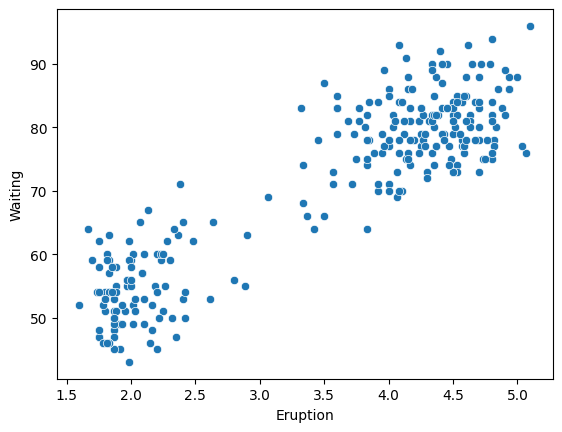

In [86]:
#scatter plot
sns.scatterplot(data=data, x='Eruption', y='Waiting')

In [87]:
# scale the dataset i.e have all the viaribles in same units
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [88]:
#create the model
kmean_model = KMeans(n_clusters=2, max_iter= 500000)
kmean_model.fit(data)

KMeans(max_iter=500000, n_clusters=2)

In [89]:
#array inside the array are the coordiantes (x,y) for centroid c1 and c2
centroids = kmean_model.cluster_centers_

In [90]:
clusters = kmean_model.fit_predict(data)
# gives the cluster i.e which cluster does the data point belong to

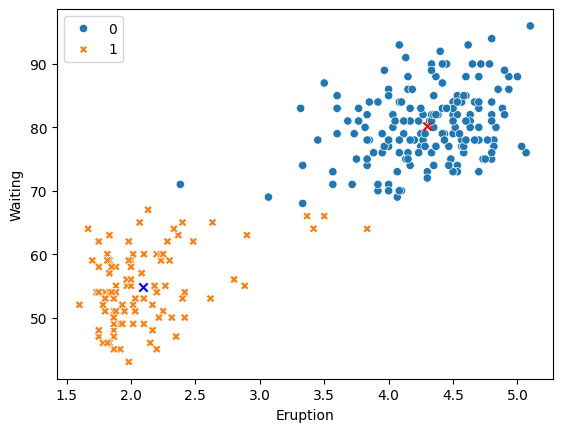

In [91]:
#visualize the clusters and the centeroids
sns.scatterplot(data=data, x='Eruption', y='Waiting', hue=clusters, style = clusters)
#plot the centroid for the cluster 1
plt.scatter(x = centroids[0, 0], y = centroids[0,1], c='red', marker='x')
#plot the centroid for the cluster 2
plt.scatter(x = centroids[1, 0], y = centroids[1,1], c='blue', marker='x')

In [92]:
#elbow method
wcss = []
k = [1, 2, 3, 4, 5, 6, 7, 8, 9 ,10]
for i in k:
    kmeans = KMeans(n_clusters=i) #create the model
    kmeans.fit(data) #trian
    wcss.append(kmeans.inertia_) #append the wcss to the list

print(wcss)

[50440.15702526103, 8901.768720947204, 5229.058840018195, 2946.0032368657057, 2057.215643305239, 1606.1925633756537, 1054.3608141949244, 820.3366931696128, 696.1503693058489, 545.4282579814588]


Text(0, 0.5, 'WCSS')

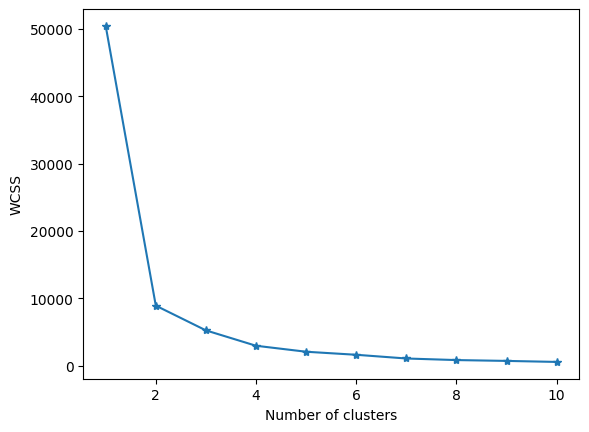

In [93]:
plt.plot(k, wcss, '*-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

<Axes: xlabel='Eruption', ylabel='Waiting'>

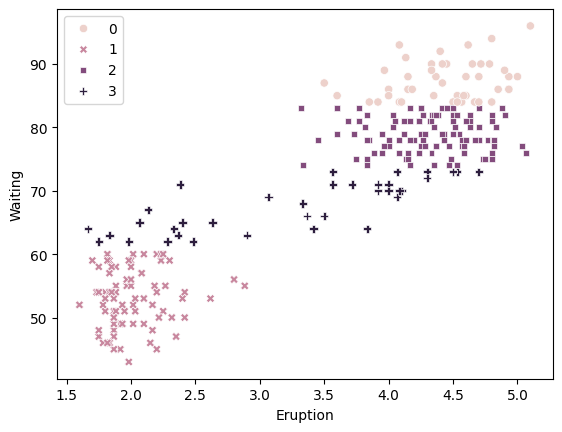

In [94]:
#train the model with cluster = 4 based on the wcss
#create the model
best_model = KMeans(n_clusters=4, max_iter= 500000)
best_model.fit(data)
centroids = best_model.cluster_centers_
clusters = best_model.fit_predict(data)

sns.scatterplot(data=data, x='Eruption', y='Waiting', hue=clusters, style = clusters)
#plot the centroid for the cluster 1
#plt.scatter(x = centroids[0, 0], y = centroids[0,1], c='red', marker='x')
#plot the centroid for the cluster 2
#plt.scatter(x = centroids[1, 0], y = centroids[1,1], c='blue', marker='x')


accroding to the elbow graph which k would u select?

Answer:

Looking at the elbow graph, it looks like the optimal number of clusters is 4, since after 4 cluster the inertia almost
start to decrease in a linear fashion.

# Hierarchical clustering  - Algometric method

In [95]:
data_cyto = pd.read_csv('cytochrome.csv', usecols = range(1, 14), header = None)
data_cyto.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,1,12,10,11,10,9,10,13,14,11,15,18
1,1,0,11,9,10,9,8,11,12,13,10,14,17
2,12,11,0,3,6,5,6,7,11,13,10,11,14
3,10,9,3,0,3,2,4,6,9,11,8,9,11
4,11,10,6,3,0,3,5,7,10,11,8,9,12


In [96]:
data_cyto1 = pd.read_csv('cytochrome.csv')
spices = list(data_cyto1.Human)
spices.insert(0, 'Human')
spices

['Human',
 'Monkey',
 'Horse',
 'Cow',
 'Dog',
 'Whale',
 'Rabbit',
 'Kangaroo',
 'Chicken',
 'Penguin',
 'Duck',
 'Turtle',
 'Frog']

In [97]:
pd.DataFrame(data = data_cyto.to_numpy(), columns = spices, index = spices)

,Human,Monkey,Horse,Cow,Dog,Whale,Rabbit,Kangaroo,Chicken,Penguin,Duck,Turtle,Frog
Human,0,1,12,10,11,10,9,10,13,14,11,15,18
Monkey,1,0,11,9,10,9,8,11,12,13,10,14,17
Horse,12,11,0,3,6,5,6,7,11,13,10,11,14
Cow,10,9,3,0,3,2,4,6,9,11,8,9,11
Dog,11,10,6,3,0,3,5,7,10,11,8,9,12
Whale,10,9,5,2,3,0,2,6,9,10,7,8,11
Rabbit,9,8,6,4,5,2,0,6,8,9,6,9,11
Kangaroo,10,11,7,6,7,6,6,0,12,11,10,11,13
Chicken,13,12,11,9,10,9,8,12,0,3,3,8,11
Penguin,14,13,13,11,11,10,9,11,3,0,4,9,13


In [98]:
#train model with the square form
from scipy.spatial.distance import squareform

square_form = squareform(data_cyto)
square_form

array([ 1, 12, 10, 11, 10,  9, 10, 13, 14, 11, 15, 18, 11,  9, 10,  9,  8,
       11, 12, 13, 10, 14, 17,  3,  6,  5,  6,  7, 11, 13, 10, 11, 14,  3,
        2,  4,  6,  9, 11,  8,  9, 11,  3,  5,  7, 10, 11,  8,  9, 12,  2,
        6,  9, 10,  7,  8, 11,  6,  8,  9,  6,  9, 11, 12, 11, 10, 11, 13,
        3,  3,  8, 11,  4,  9, 13,  7, 11, 10])

<ipython-input-99-b85f8c4e090d>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  single_link = linkage(data_cyto, method = 'single')


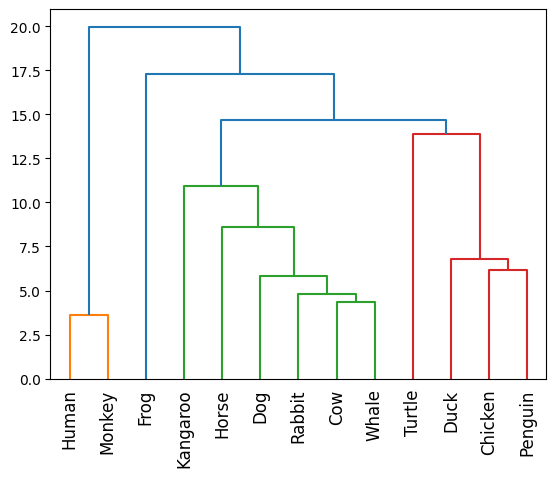

In [99]:
#single linkage
single_link = linkage(data_cyto, method = 'single')
dendrogram(single_link, labels = spices, leaf_rotation = 90)
plt.show()

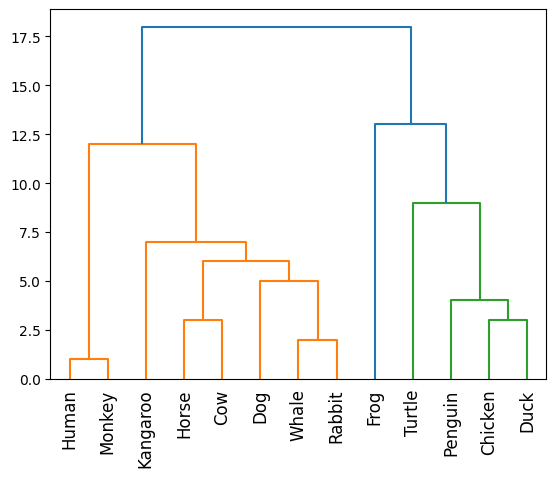

In [100]:
#complete linkage
complete_link = linkage(square_form, method = 'complete')
dendrogram(complete_link, labels = spices, leaf_rotation = 90)
plt.show()

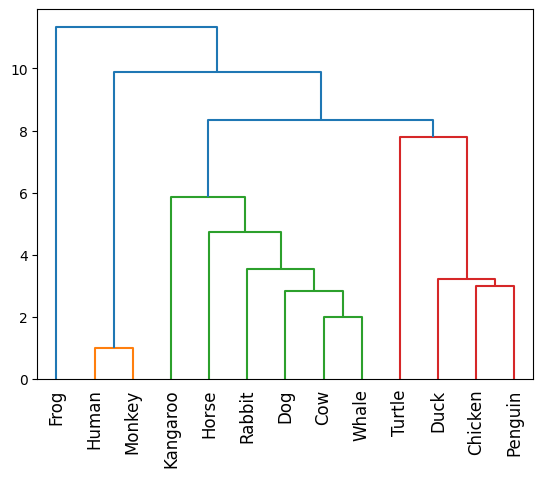

In [101]:
#centroid linkage
centroid_link = linkage(square_form, method = 'centroid')
dendrogram(centroid_link, labels = spices, leaf_rotation = 90)
plt.show()

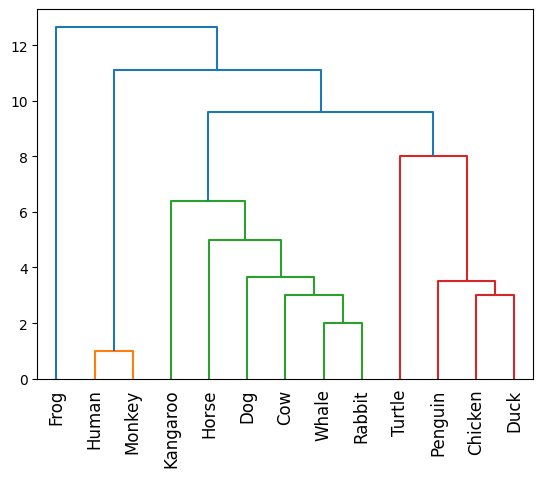

In [102]:
#avrage linkage
avg_link = linkage(square_form, method = 'average')
dendrogram(avg_link, labels = spices, leaf_rotation = 90)
plt.show()

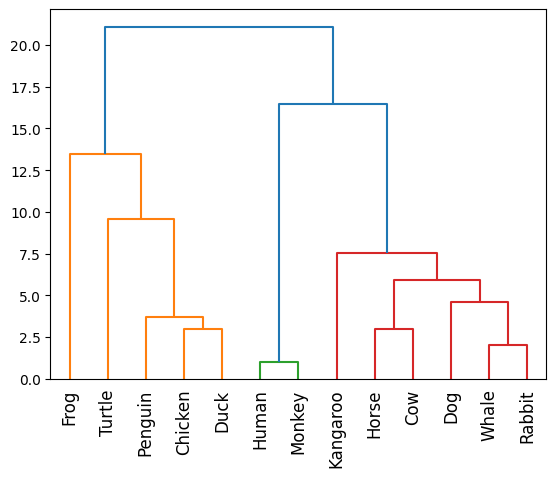

In [103]:
#ward linkage
ward_link = linkage(square_form, method = 'ward')
dendrogram(ward_link, labels = spices, leaf_rotation = 90)
plt.show()

# PCA

In [104]:
rock = pd.read_csv('rock.csv')
rock.head()

,Area,Perimeter,Shape,Permeability
0,4990,2791.90,0.090330,6.3
1,7002,3892.60,0.148622,6.3
2,7558,3930.66,0.183312,6.3
3,7352,3869.32,0.117063,6.3
4,7943,3948.54,0.122417,17.1


<Axes: >

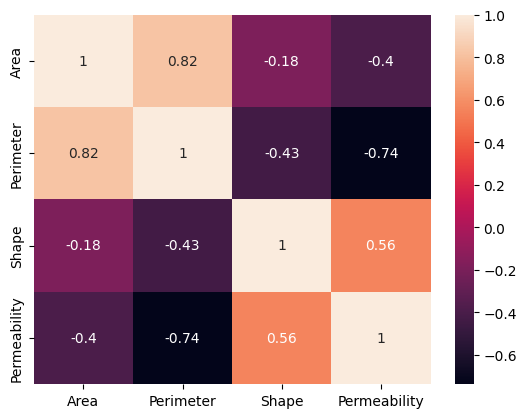

In [105]:
sns.heatmap(rock.corr(), annot= True)


<Axes: xlabel='Perimeter', ylabel='Permeability'>

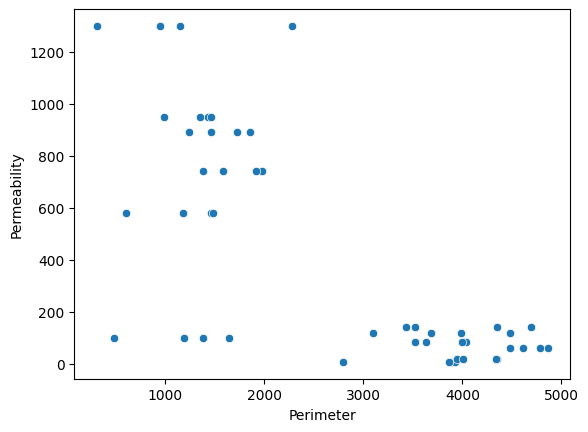

In [106]:
sns.scatterplot(data=rock, x='Perimeter', y='Permeability')

In [107]:
rock_scaled = scaler.fit_transform(rock)
rock_scaled = pd.DataFrame(data = rock_scaled, columns = rock.columns)
rock_scaled.head()

,Area,Perimeter,Shape,Permeability
0,-0.827538,0.077427,-1.546569,-0.944410
1,-0.069935,0.854390,-0.841039,-0.944410
2,0.139423,0.881256,-0.421176,-0.944410
3,0.061855,0.837957,-1.223007,-0.944410
4,0.284391,0.893877,-1.158206,-0.919481


In [108]:
#CREATE AND FIT THE PCA MODEL
pca_model = PCA(n_components= len(rock_scaled.columns))
pca_model.fit(rock_scaled)
rock_components = pca_model.transform(rock_scaled)
rock_components.shape

(48, 4)

In [109]:
# variance explained by each column
pca_model.explained_variance_

array([2.66447132, 0.94255618, 0.40448323, 0.07359565])

In [110]:
#precentage of the variecne expaiend by each component
pca_model.explained_variance_ratio_

array([0.65224037, 0.2307299 , 0.09901413, 0.0180156 ])

Text(0, 0.5, 'Explained variance')

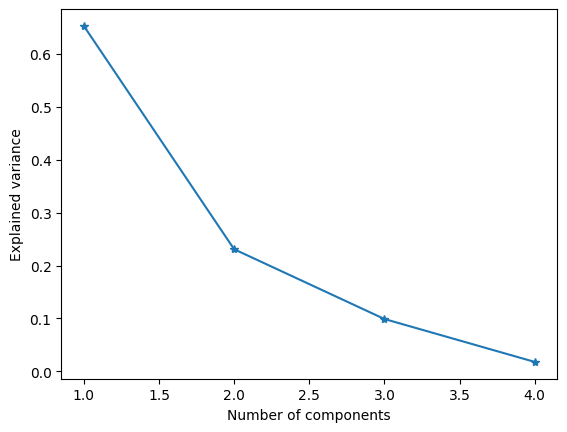

In [111]:
#visiualize explained variance
plt.plot([1,2,3,4], pca_model.explained_variance_ratio_, '*-')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Text(0, 0.5, 'Explained variance')

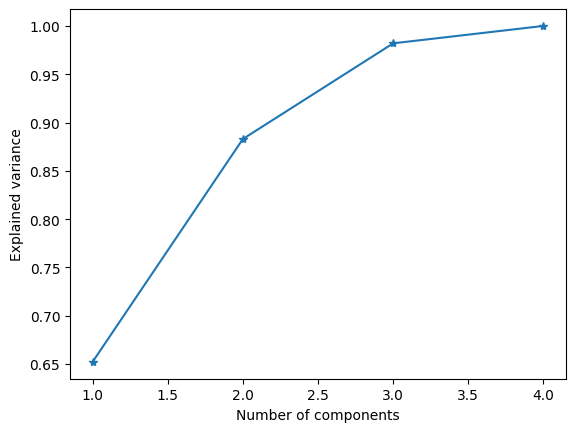

In [112]:
#visiualize the cummulative variacne
cum_variance = np.cumsum(pca_model.explained_variance_ratio_)
plt.plot([1,2,3,4], cum_variance, '*-')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [113]:
rock_pca = rock_components[:, [0,1]]
rock_pca = pd.DataFrame(data = rock_pca, columns = ['PC1', 'PC2'])
rock_pca.head()

,PC1,PC2
0,0.755305,-1.841478
1,1.294640,-0.701850
2,1.244676,-0.272732
3,1.497691,-0.895506
4,1.597658,-0.694925


<Axes: >

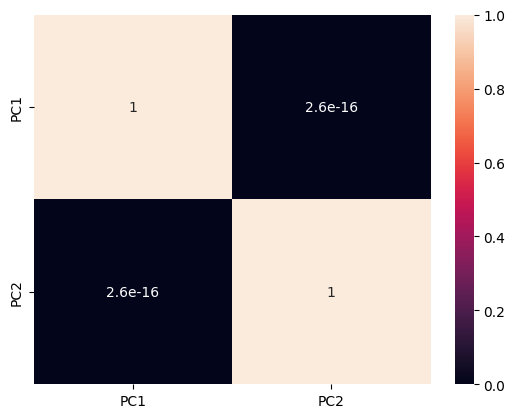

In [114]:
sns.heatmap(rock_pca.corr(), annot= True)

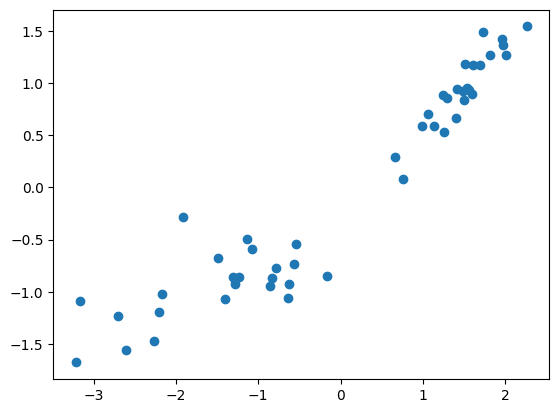

In [115]:
plt.scatter(rock_pca['PC1'], rock_scaled['Perimeter'])

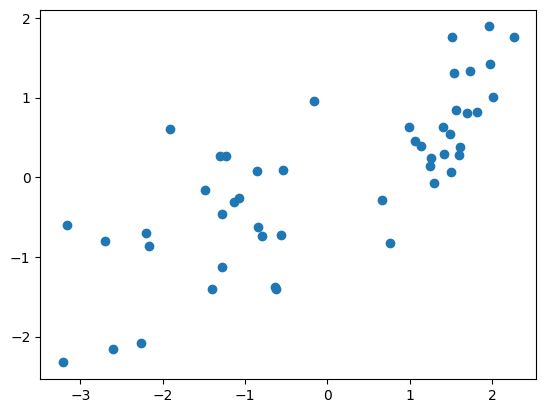

In [116]:
plt.scatter(rock_pca['PC1'], rock_scaled['Area'])

<Axes: xlabel='PC1', ylabel='PC2'>

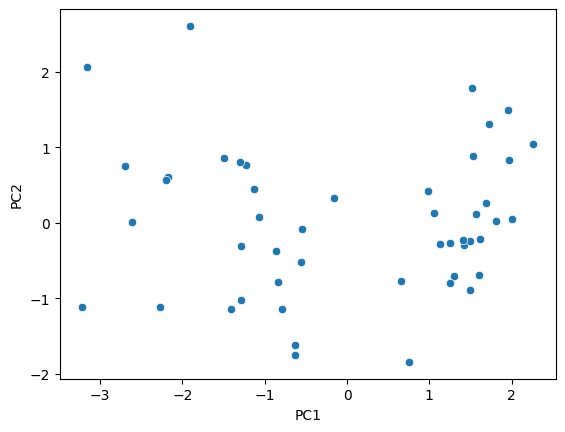

In [117]:
sns.scatterplot(data=rock_pca, x='PC1', y='PC2')

### create, train, visualize using k mean

In [118]:
rock_pca.head()

,PC1,PC2
0,0.755305,-1.841478
1,1.294640,-0.701850
2,1.244676,-0.272732
3,1.497691,-0.895506
4,1.597658,-0.694925


In [119]:
#create the model
kmean_model_pca = KMeans(n_clusters=3, max_iter= 500000)
kmean_model_pca.fit(rock_pca)

KMeans(max_iter=500000, n_clusters=3)

In [120]:
#array inside the array are the coordiantes (x,y) for centroid c1 and c2
centroids = kmean_model_pca.cluster_centers_

In [123]:
clusters = kmean_model_pca.fit_predict(rock_pca)
# gives the cluster i.e which cluster does the data point belong to

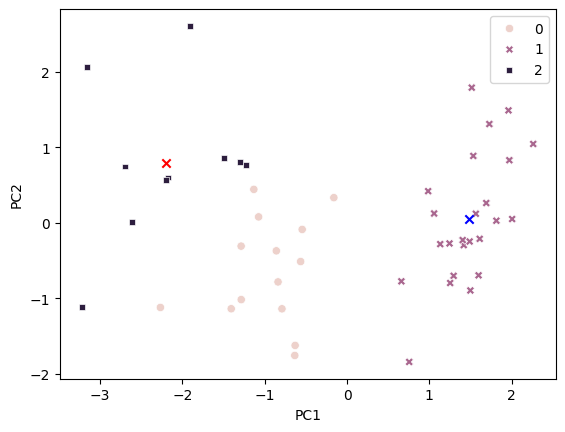

In [125]:
#visualize the clusters and the centeroids
sns.scatterplot(data=rock_pca, x='PC1', y='PC2', hue=clusters, style = clusters)
#plot the centroid for the cluster 1
plt.scatter(x = centroids[0, 0], y = centroids[0,1], c='red', marker='x')
#plot the centroid for the cluster 2
plt.scatter(x = centroids[1, 0], y = centroids[1,1], c='blue', marker='x')